## Objectif
L'objectif de ce sujet d'étude est de comprendre et implémenter le modèle épidémiologique SIRD (Susceptibles, Infectés, Rétabli) avec une composante supplémentaire pour les décès. Vous utiliserez la méthode d'Euler pour résoudre numériquement le système d'équations différentielles qui décrit l'évolution de la maladie dans une population.
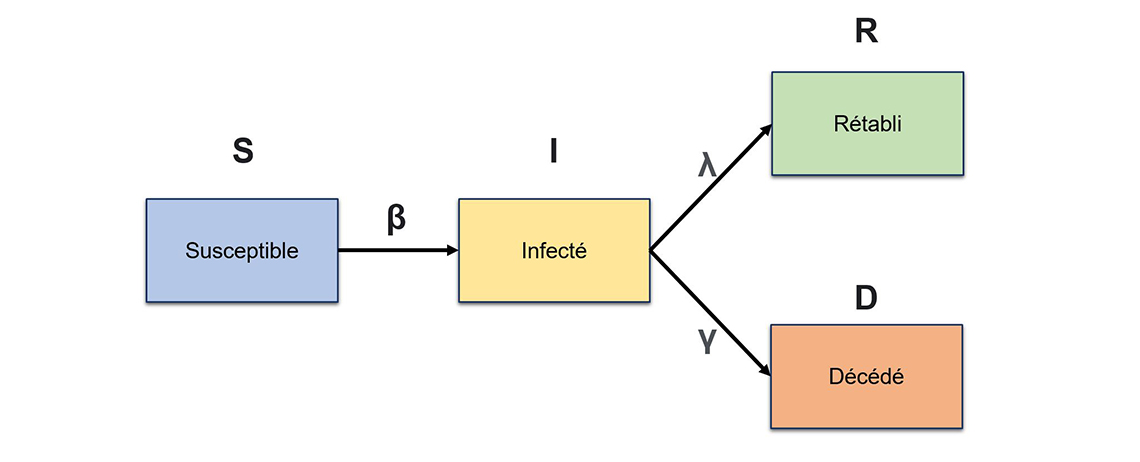


## Contexte
Le modèle SIR est un modèle mathématique utilisé en épidémiologie pour décrire la propagation d'une maladie infectieuse dans une population. Pour ce sujet, nous ajoutons une composante pour les décès (D), ce qui donne le modèle SIRD.

Les variables du modèle sont les suivantes :
- $S(t)$ : % de la population susceptibles d'être infectées à l'instant $t$
- $I(t)$ : % de la population infectées à l'instant $t$
- $R(t)$ : % de la population rétablies (et immunisées) à l'instant $t$
- $D(t)$ : % de la population décédées à l'instant $t$

Les paramètres du modèle sont :
- $\beta$ : Taux de transmission de la maladie (probabilité de transmission par contact)
- $\gamma$ : Taux de guérison (et d'immunisation)
- $\mu$ : Taux de mortalité dû à la maladie

Les équations différentielles qui décrivent le modèle SIRD sont :
- $\frac{dS}{dt} = -\beta \cdot S \cdot I$
- $\frac{dI}{dt} = \beta \cdot S \cdot I - \gamma \cdot I - \mu \cdot I$
- $\frac{dR}{dt} = \gamma \cdot I$
- $\frac{dD}{dt} = \mu \cdot I$

### Étape 1 : Implémentation de la méthode d'Euler
0. Discretiser le système d'équations différentielles
1. Écrire une fonction Python qui implémente la méthode d'Euler pour ce système d'équations différentielles. Cette fonction doit prendre en entrée :
    - Le paramétrage des équations différentielles
    - Les conditions initiales
    - Le pas de temps
    - La durée de la simulation

**Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**

In [8]:
#0 et 1
def sird_euler(S, I, R, D, beta, gamma, mu):
  
  time = [0]

  for _ in range(1, nb_steps):

    newVal_time = time[-1]+step
    newVal_S = (step * ((-beta) * S[-1] * I[-1])) + S[-1]
    newVal_I = (step * (beta * S[-1] * I[-1] + (-I[-1] * (gamma + mu)))) + I[-1]
    newVal_R = (step * (gamma * I[-1])) + R[-1]
    newVal_D = (step * (mu*I[-1])) + D[-1]

    time.append(newVal_time)
    S.append(newVal_S)
    I.append(newVal_I)
    R.append(newVal_R)
    D.append(newVal_D)

  time = time[::100]  # Prendre un point tous les 100 pas (1 jour)
  S_predicted = S[::100]
  I_predicted = I[::100]
  R_predicted = R[::100]
  D_predicted = D[::100]

  return S_predicted, I_predicted, R_predicted, D_predicted, time

### Étape 2 : Simulation et analyse
1. Effectuer une simulation pour un jeu de paramètres donné:
- $\beta$ = 0.5
- $\gamma$ = 0.15
- $\mu$ = 0.015
- $S(0)$ = 99 %
- $I(0)$ = 1 %
- $R(0)$ = 0 %
- $D(0)$ = 0 %
- un pas de temps choisi (par exemple 0.01).
- **Rappel : Ici  t  est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**
2. Tracer les courbes de $S(t)$, $I(t)$, $R(t)$ et $D(t)$ en fonction du temps.

In [9]:
#1
S = [0.99]
I = [0.01]
R = [0]
D = [0]
beta, gamma, mu = 0.5, 0.15, 0.015
step = 0.01
nb_steps = int(90/step) # nombre total de pas pour couvrir 90 jours

S_predicted, I_predicted, R_predicted, D_predicted, time = sird_euler(S, I, R, D, beta, gamma, mu)



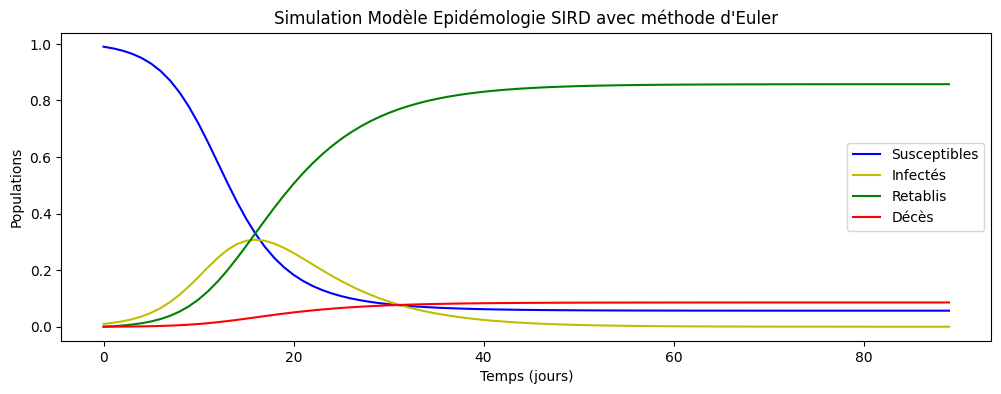

In [10]:
#2
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(time, S_predicted, "b-", label="Susceptibles")
plt.plot(time, I_predicted, "y-", label="Infectés")
plt.plot(time, R_predicted, "g-", label="Retablis")
plt.plot(time, D_predicted, "r-", label="Décès")
plt.title("Simulation Modèle Epidémologie SIRD avec méthode d'Euler")
plt.xlabel("Temps (jours)")
plt.ylabel("Populations")
plt.legend()
plt.show()

## Etape 3: Ajustement des paramètres du modèle SIRD avec des données empiriques

### Objectif
L'objectif de cet exercice est de trouver les valeurs des paramètres $\beta\), \(\gamma\) et \(\mu\) qui permettent de reproduire au mieux les données générées de l'évolution de l'épidémie, en utilisant un dataset bruité.

### Instructions

1. **Lire les données du fichier `sird_dataset.csv`.**
2. **Implémenter une fonction de coût** qui mesure l'écart entre les données observées et les résultats du modèle SIRD pour un jeu de paramètres donné.(Justifiez votre choix, pourquoi un MSE au lieu d'une CCE ou inversement)
3. **Utiliser une méthode d'optimisation (Grid Search)** pour minimiser cette fonction de coût et trouver les valeurs optimales de $\beta$, $\gamma$ et $\mu$.

Voici les valeurs possible pour le triplet $\beta$, $\gamma$ et $\mu$ :
- $\beta$ varie de 0.25 à 0.5
- $\gamma$ varie de 0.08 à 0.15
- $\mu$ varie de 0.005 à 0.015

4. Visualisez sur un même graphique les résultats de votre modèle théorique optimal et les données empiriques.
**Rappel** : Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée


In [11]:
#1
import pandas as pd

df = pd.read_csv("sird_dataset.csv")
df.head()

,Jour,Susceptibles,Infectés,Rétablis,Décès
0,0,0.998894,0.003197,-0.002455,-0.004622
1,1,0.991526,0.000409,0.010702,0.008857
2,2,0.982164,0.011018,0.004865,-0.001515
3,3,0.988132,0.008969,-0.006308,0.003571
4,4,0.971090,0.007307,0.005403,0.004894


In [12]:
def sird_mse(predict_value, true_value) :
    return np.mean((predict_value - true_value)**2)

In [13]:
#2
# MSE
import numpy as np
def sird_mse(predict_value, true_value) :
    return np.mean((predict_value - true_value)**2)


S_mse = sird_mse(S_predicted, df['Susceptibles'].values)
I_mse = sird_mse(I_predicted, df['Infectés'].values)
R_mse = sird_mse(R_predicted, df['Rétablis'].values)
D_mse = sird_mse(D_predicted, df["Décès"].values)
 
print(S_mse+I_mse+R_mse+D_mse)


0.08725376259319659


### Justification de choix du MSE au lieu d'une CCE :

En fait, la fonction de cout MSE est la plus utilisées pour des problèmes de regression (notre cas), par contre, la CCE est dédiée plus pour les problème de classification.
- MSE mesure la différence entre les valeurs réelles et les valeurs prédites, tandis que CCE mesure la dissimilarité entre les probabilités prédites et les étiquettes réelles (0 ou 1 pour la classification binaire, ou plus pour les problèmes multi-classes).          

In [14]:
#3
# Grid Search
from itertools import product

def grid_search_sird(ground_truth, step, nb_days, start_day, last_day):

    best_betas = np.linspace(0.25, 0.5, 10)
    best_gammas = np.linspace(0.08, 0.15, 10)
    best_mus = np.linspace(0.005, 0.015, 10)


    S0 = [0.99]
    I0 = [1]
    R0 = [0]
    D0 = [0]

    best_mse = float('inf')
    best_beta, best_gamma, best_mu = None, None, None


    for beta, gamma, mu in product(best_betas, best_gammas, best_mus):
        S_grid_search_optimise, I_grid_search_optimise, R_grid_search_optimise, D_grid_search_optimise, t_grid_search = sird_euler(S0, I0, R0, D0, beta, gamma, mu)


        S_grid_search_optimise = S_grid_search_optimise[start_day:last_day]
        I_grid_search_optimise = I_grid_search_optimise[start_day:last_day]
        R_grid_search_optimise = R_grid_search_optimise[start_day:last_day]
        D_grid_search_optimise = D_grid_search_optimise[start_day:last_day]
        t_grid_search = t_grid_search[start_day:last_day]

        mse_grid_search_optimise = sird_mse(S_grid_search_optimise, ground_truth['Susceptibles'])+sird_mse(I_grid_search_optimise, ground_truth['Infectés'])+sird_mse(R_grid_search_optimise, ground_truth['Rétablis'])+sird_mse(D_grid_search_optimise, ground_truth['Décès'])
        

        if mse_grid_search_optimise < best_mse:
            best_mse = mse_grid_search_optimise
            best_beta, best_gamma, best_mu = beta, gamma, mu
        
    return best_mse, best_beta, best_gamma, best_mu

best_mse, best_beta, best_gamma, best_mu = grid_search_sird(df, 0.01, 90, 0, 90)
print(f"Meilleurs paramètres : beta = {best_beta}, gamma = {best_gamma}, mu = {best_mu}")


Meilleurs paramètres : beta = 0.25, gamma = 0.08, mu = 0.005


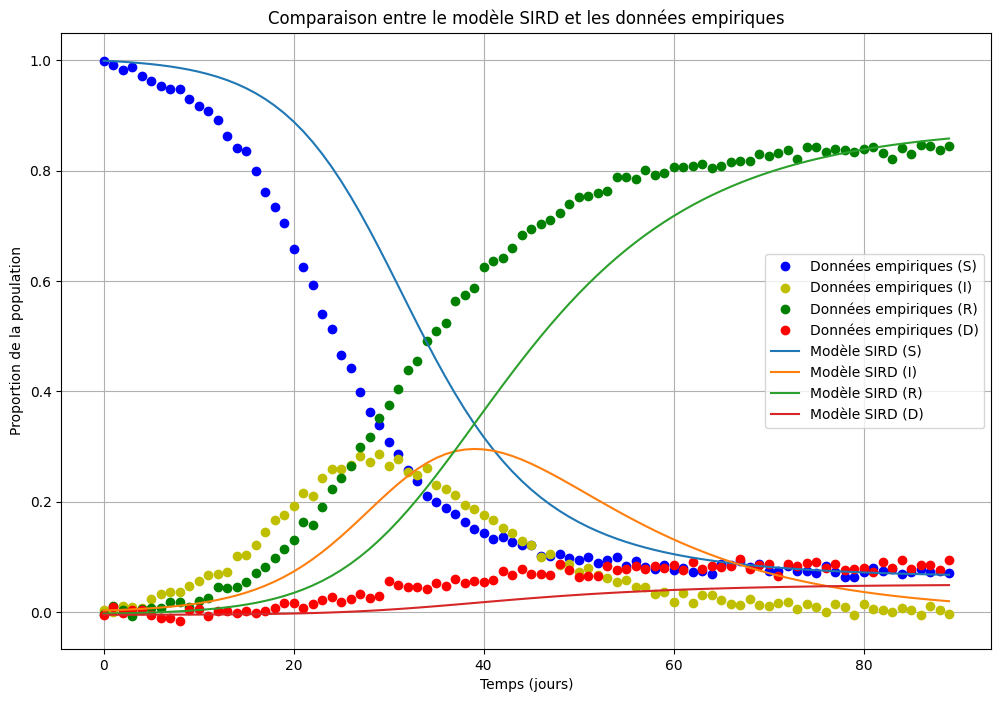

In [15]:
#4
# Simulation avec les meilleurs paramètres
S0 = [float(df['Susceptibles'].iloc[0])]
I0 = [float(df['Infectés'].iloc[0])]
R0 = [float(df['Rétablis'].iloc[0])]
D0 = [float(df['Décès'].iloc[0])]
S, I, R, D, t = sird_euler(S0, I0, R0, D0, best_beta, best_gamma, best_mu)

# Tracé des résultats
plt.figure(figsize=(12, 8))
plt.plot(df['Jour'], df['Susceptibles'], 'bo', label='Données empiriques (S)')
plt.plot(df['Jour'], df['Infectés'], 'yo', label='Données empiriques (I)')
plt.plot(df['Jour'], df['Rétablis'], 'go', label='Données empiriques (R)')
plt.plot(df['Jour'], df['Décès'], 'ro', label='Données empiriques (D)')
plt.plot(t, S, label='Modèle SIRD (S)')
plt.plot(t, I, label='Modèle SIRD (I)')
plt.plot(t, R, label='Modèle SIRD (R)')
plt.plot(t, D, label='Modèle SIRD (D)')
plt.xlabel('Temps (jours)')
plt.ylabel('Proportion de la population')
plt.title('Comparaison entre le modèle SIRD et les données empiriques')
plt.legend()
plt.grid()
plt.show()

### Étape 4 : Scénarios de contrôle
On introduit un paramètre d'observation $R_0$ (le nombre de reproduction de base) dans le contexte du modèle SIRD est :

- $\ R_0 = \frac{\beta}{\gamma + \mu} \$

1. Expliquez intuitivement ce paramètre d'observation quand $R_0<1$ et quand $R_0>1$
2. Introduire une intervention (par exemple, la réduction de $\beta$ due à des mesures de distanciation sociale) et analyser son impact sur la dynamique de l'épidémie.
3. Comparer les scénarios avec et sans intervention.

### **Réponse Q1:**
Le nombre de reproduction de base (R0) est une mesure qui indique combien de personnes, en moyenne, un individu infecté va contaminer dans une population entièrement sensible. Il est utilisé pour évaluer la contagiosité d'une maladie, et donc :
1. Quand R₀ > 1, cela signifie que la propagation du virus est en hausse, car chaque personne infectée en transmet le virus à plus d'une autre.
2. Quand R₀ < 1, cela signifie que la propagation du virus est en diminution, car chaque personne infectée en transmet le virus à moins d'une autre, entraînant une diminution progressive des cas.1.


R0 est: 2.941176470588235


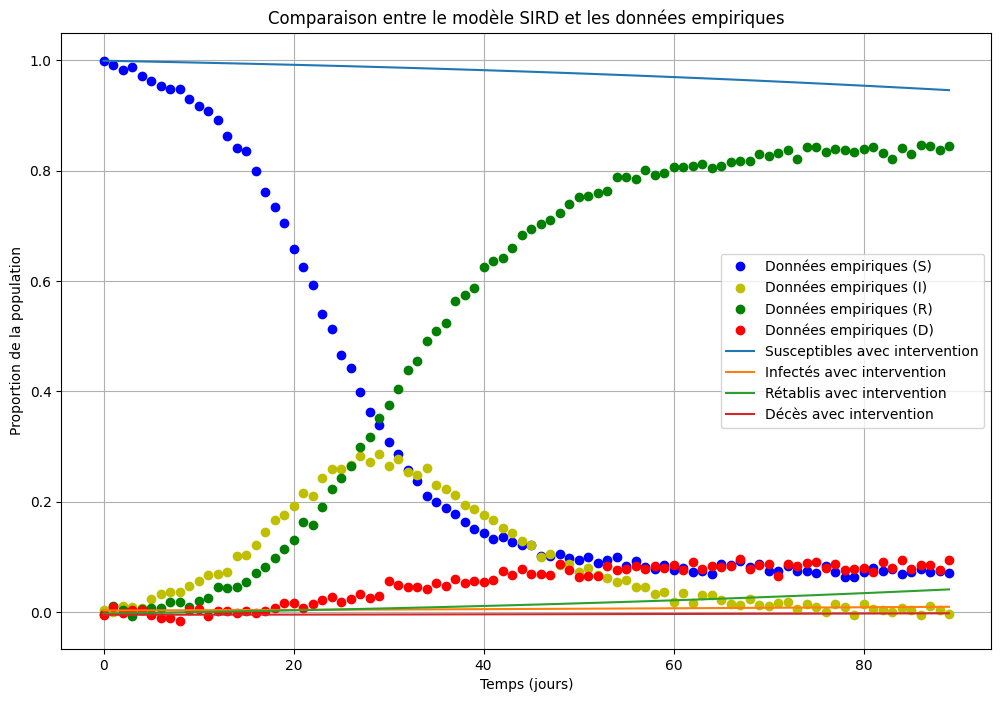

In [16]:
#2
R0 = best_beta / (best_gamma + best_mu)
print(f"R0 est: {R0}")

new_beta = 0.1
new_gamma = best_gamma
new_mu = best_mu

S0 = [float(df['Susceptibles'].iloc[0])]
I0 = [float(df['Infectés'].iloc[0])]
R0 = [float(df['Rétablis'].iloc[0])]
D0 = [float(df['Décès'].iloc[0])]

S_with_intervention, I_with_intervention, R_with_intervention, D_with_intervention, t = sird_euler(S0, I0, R0, D0, new_beta, new_gamma, new_mu)

plt.figure(figsize=(12, 8))
plt.plot(df['Jour'], df['Susceptibles'], 'bo', label='Données empiriques (S)')
plt.plot(df['Jour'], df['Infectés'], 'yo', label='Données empiriques (I)')
plt.plot(df['Jour'], df['Rétablis'], 'go', label='Données empiriques (R)')
plt.plot(df['Jour'], df['Décès'], 'ro', label='Données empiriques (D)')
plt.plot(t, S_with_intervention, label='Susceptibles avec intervention')
plt.plot(t, I_with_intervention, label='Infectés avec intervention')
plt.plot(t, R_with_intervention, label='Rétablis avec intervention ')
plt.plot(t, D_with_intervention, label='Décès avec intervention ')
plt.xlabel('Temps (jours)')
plt.ylabel('Proportion de la population')
plt.title('Comparaison entre le modèle SIRD et les données empiriques')
plt.legend()
plt.grid()
plt.show()

### **Réponse Q3:** 
On a R0 = 2.941176470588235 > 1, et donc chaque personne infectée v transmettre le virus à plus d'une autre, ce qu'on peut bien voii dans le graphe ci dessus, on remarque bien qu'après intervention du paramètres R0, les personnes susceptibles a etre infectés est quasiment au max et reste quasi-constant pour notre cas, durant toute la durée de notre étude; Au contraire, au scénario sans intervention, on peut bien voir que les personnes susceptibles diminue au cours du temps, et le nombres des personnes rétablis augmente.

Abdessamad Touzani 